In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = 'BDT_ABCD_VR2_goodvtx_v11_NJetG0L3_OSSF'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [5]:
# Data
data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

In [6]:
# sig_histo / bkg_histo is a dictionary of variables
print(bkg_histo.keys())

dict_keys(['sel_e1_pt', 'sel_e1_eta', 'sel_e1_phi', 'sel_e1_dxy', 'sel_e1_dxySignif', 'sel_e1_vxy1', 'sel_e1_vz', 'sel_e2_pt', 'sel_e2_eta', 'sel_e2_phi', 'sel_e2_dxy', 'sel_e2_dxySignif', 'sel_e2_vxy1', 'sel_e2_vz', 'sel_e1_dxy_fromPV', 'sel_e2_dxy_fromPV', 'sel_vtx_dR', 'sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_leadpT', 'sel_vtx_METdPhi', 'sel_vtx_mindRj', 'sel_vtx_chi2', 'sel_vtx_mass', 'sel_vtx_mindPhiJ', 'sel_vtx_sign', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_type', 'sel_vtx_minEleDrJ', 'sel_vtx_minEleDPhiJ', 'sel_vtx_mass_low', 'sel_vtx_mindxy_low', 'sel_vtx_sign_etaProd', 'sel_vtx_LxyCosThetaColl', 'sel_vtx_LxyCosThetaCollZoom', 'sel_vtx_LxyCosThetaCollZoomZoom', 'sel_vtx_eleDphi', 'sel_vtx_maxMiniRelIso', 'sel_vtx_maxMiniRelIsoCorr', 'sel_vtx_mass_refit', 'sel_vtx_mass_low_refit', 'sel_vtx_pt_refit', 'sel_vtx_eta_refit', 'sel_vtx_phi_refit', 'sel_vtx_dR_refit', 'sel_vtx_mass_refit_vs_sel_vtx_mass', 'sel_vtx_mass_low_refit_vs_sel_

## Signal

In [7]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [8]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'Leading jet pT > 80 GeV',
 'Leading jet |eta| < 2.4',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'OSSF',
 'BDT']

In [9]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [10]:
table = eff_cutflow
table.columns = cutnames

In [11]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-100_samples_Efficiency.csv


In [12]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [13]:
table = cts_cutflow
table.columns = cutnames

In [14]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,27.5180,27.4900,26.5657,26.5657,26.2251,25.5668,1.1716
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315",666.7773,666.1743,642.8489,642.8489,635.0341,617.6829,21.1941
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156",827.0445,825.9792,797.3672,797.3672,787.3198,767.1020,22.3545
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,45.9089,45.8901,44.1806,44.1744,43.5820,42.4655,1.2536
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733","1,102.7526","1,102.0333","1,064.7355","1,064.7355","1,050.8564","1,018.2555",35.3283
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304","1,478.2941","1,477.9960","1,424.9048","1,424.9048","1,406.4192","1,361.3700",39.0623
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785",714.5297,714.5297,687.9354,687.9354,680.3314,656.2454,18.9935
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692","11,685.7826","11,685.7826","11,173.1411","11,173.1411","10,978.4487","10,359.8293",441.4155
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,107.2824,107.2824,103.1451,103.1451,102.3719,99.0149,2.8437
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,184.6540","2,237.3733","2,234.0401","2,160.7601","2,160.7601","2,126.5131","2,065.1446",42.3339


In [15]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [16]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [17]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [18]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,27.5180,27.4900,26.5657,26.5657,26.2251,25.5668,1.1716
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315",666.7773,666.1743,642.8489,642.8489,635.0341,617.6829,21.1941
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156",827.0445,825.9792,797.3672,797.3672,787.3198,767.1020,22.3545
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,45.9089,45.8901,44.1806,44.1744,43.5820,42.4655,1.2536
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733","1,102.7526","1,102.0333","1,064.7355","1,064.7355","1,050.8564","1,018.2555",35.3283
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304","1,478.2941","1,477.9960","1,424.9048","1,424.9048","1,406.4192","1,361.3700",39.0623
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785",714.5297,714.5297,687.9354,687.9354,680.3314,656.2454,18.9935
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692","11,685.7826","11,685.7826","11,173.1411","11,173.1411","10,978.4487","10,359.8293",441.4155
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,107.2824,107.2824,103.1451,103.1451,102.3719,99.0149,2.8437
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,184.6540","2,237.3733","2,234.0401","2,160.7601","2,160.7601","2,126.5131","2,065.1446",42.3339


In [19]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'VR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//VR_Signal_ctau-100_samples_Raw.csv


['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_1_m5to40.png


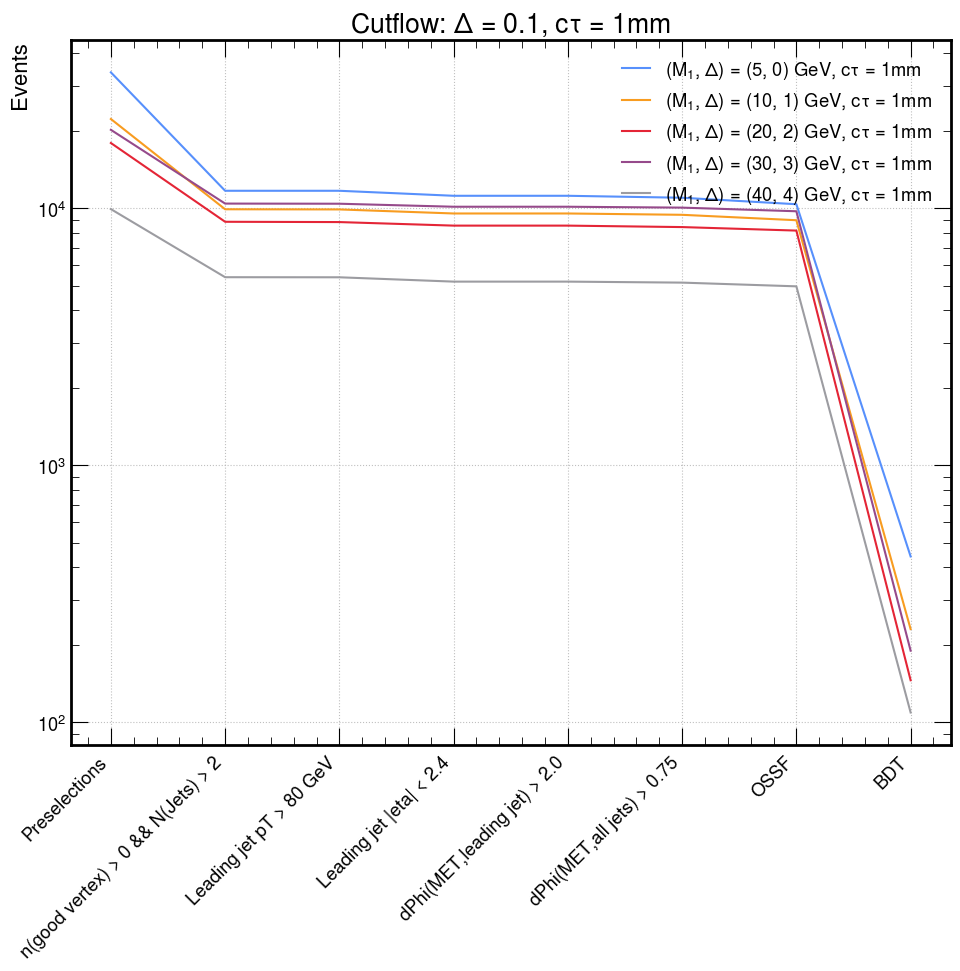

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_10_m5to40.png


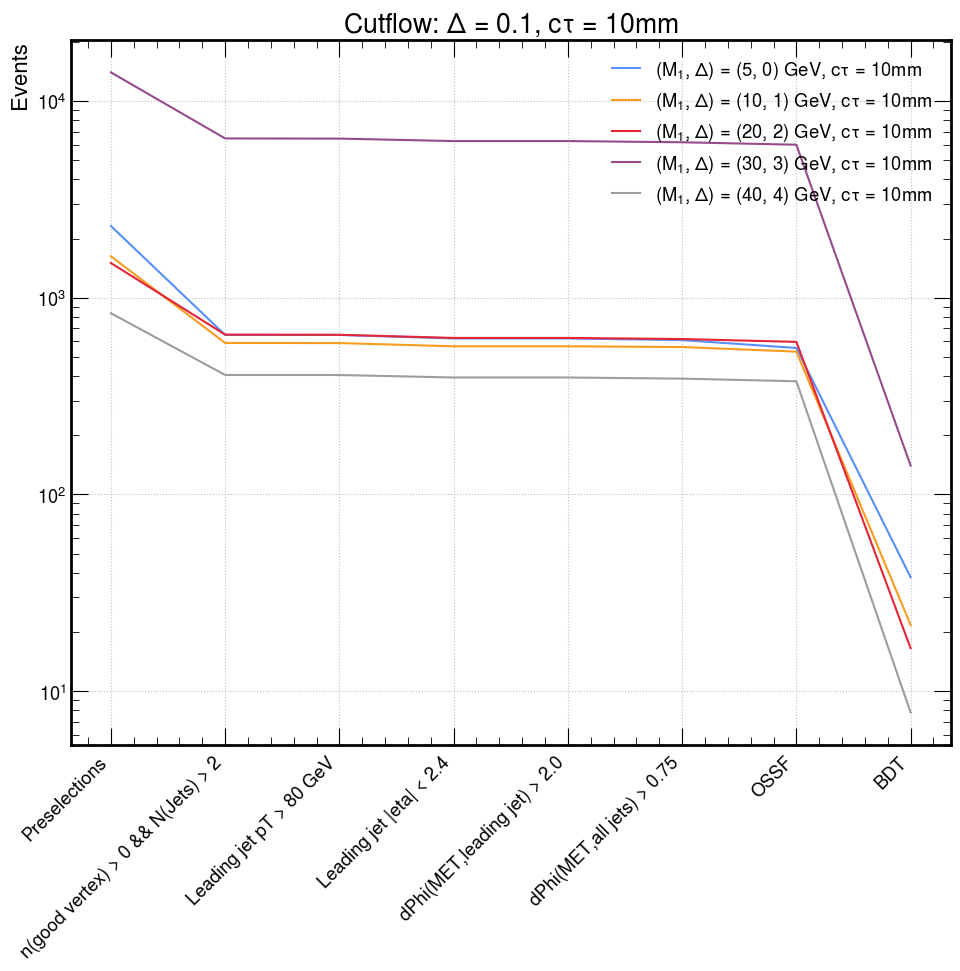

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_100_m5to40.png


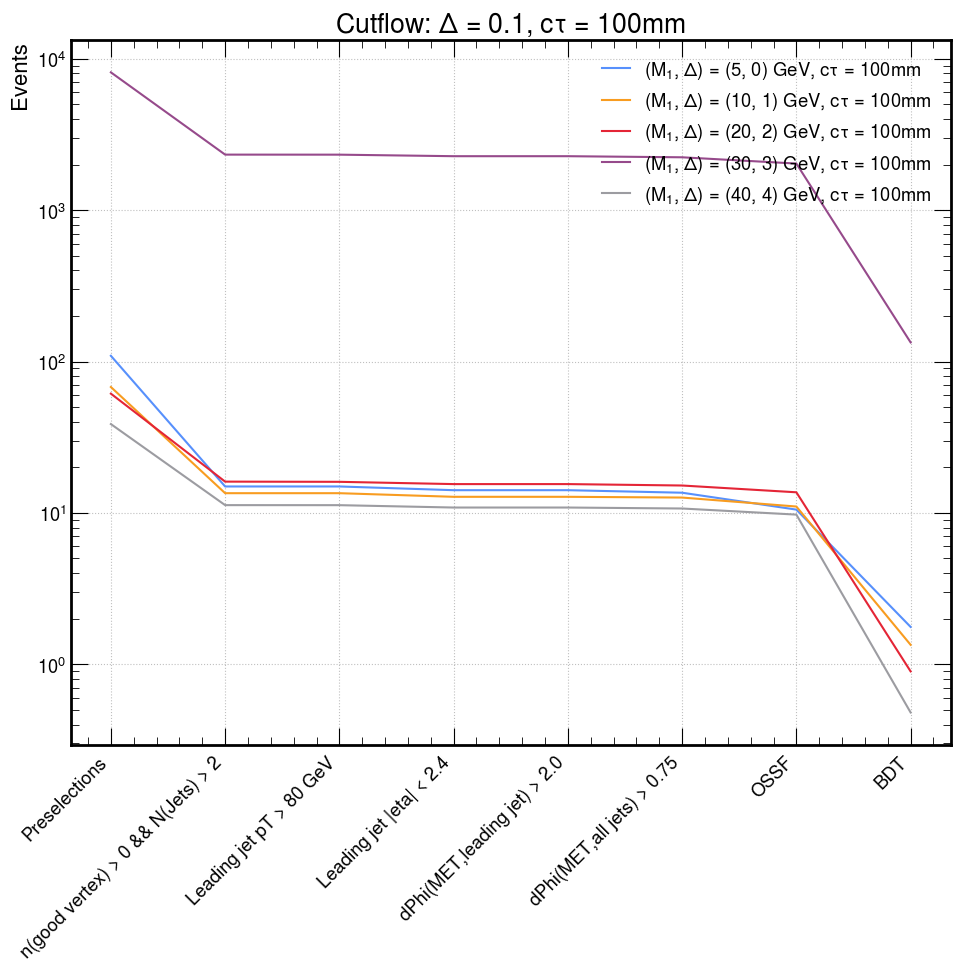

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_1_m5to40.png


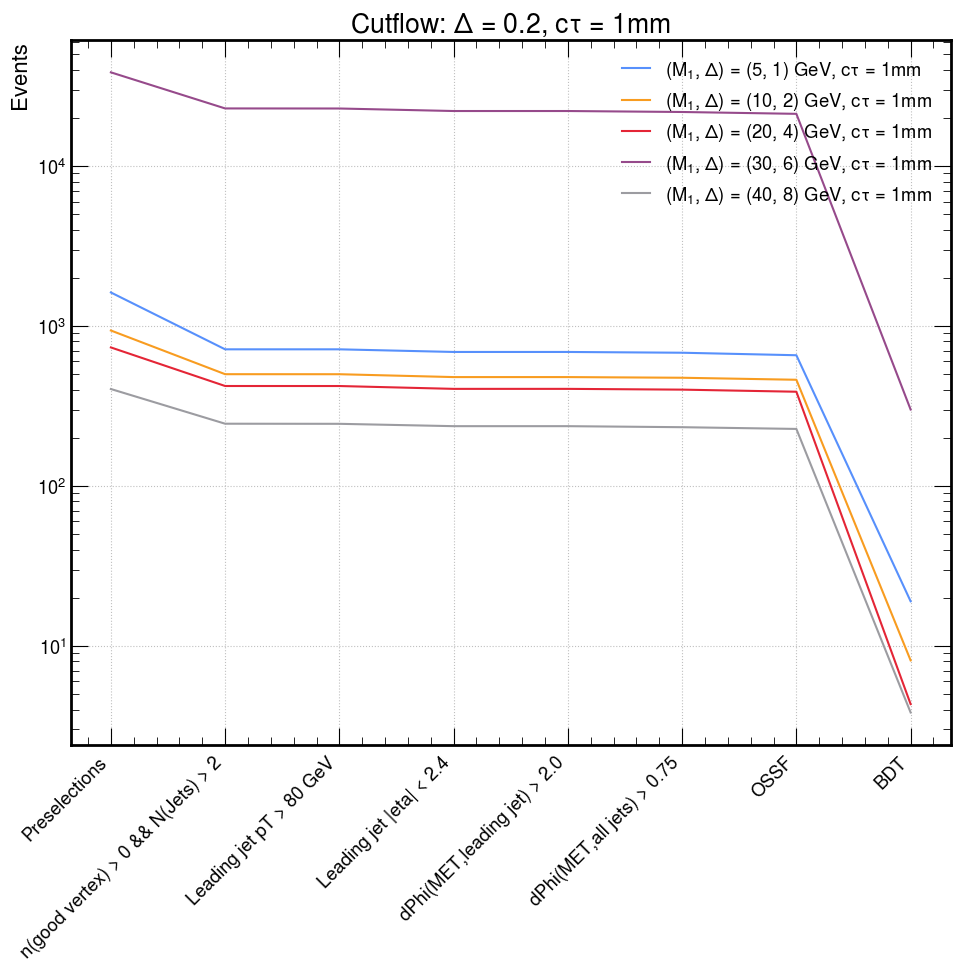

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_10_m5to40.png


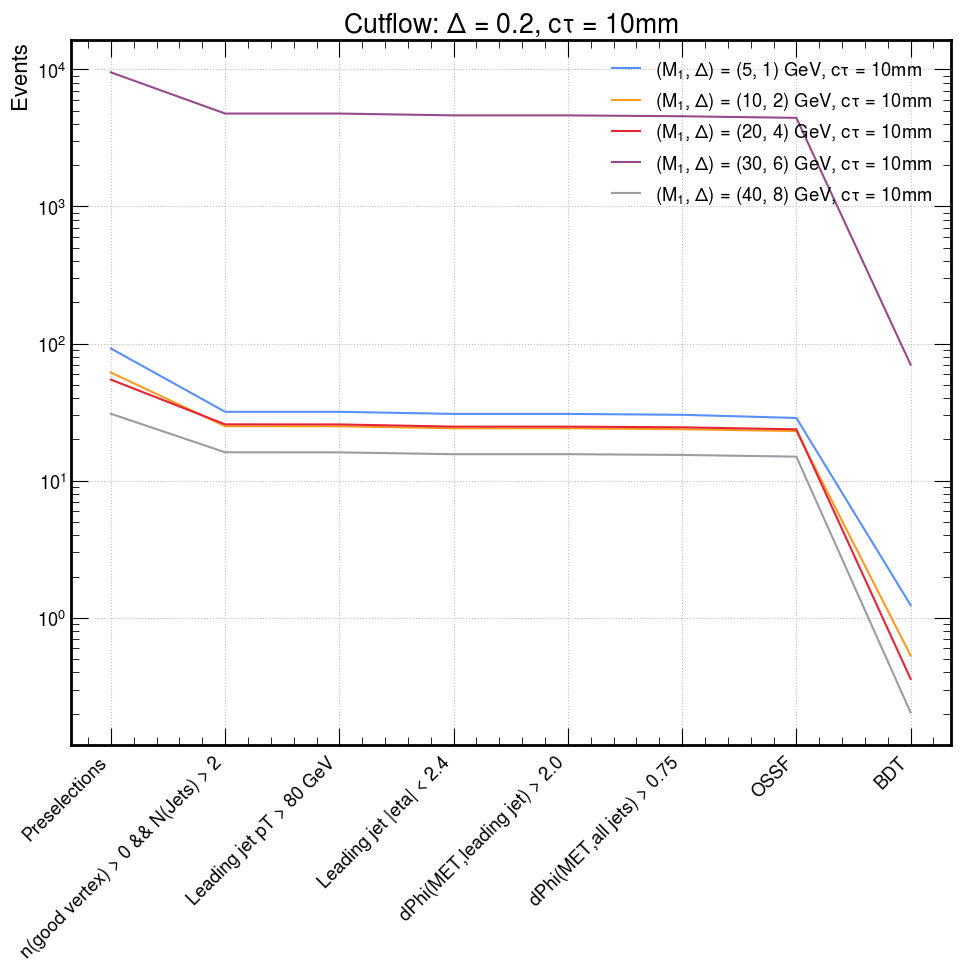

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_100_m5to40.png


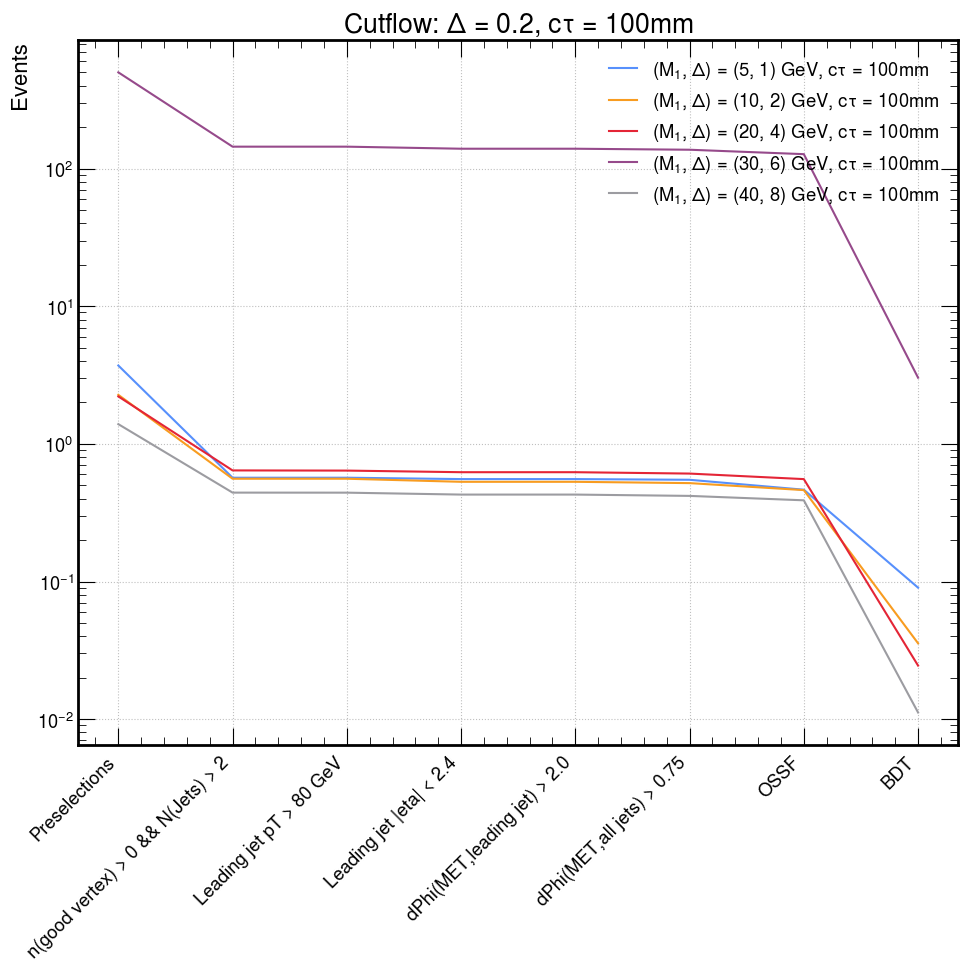

In [20]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_1_m50to100.png


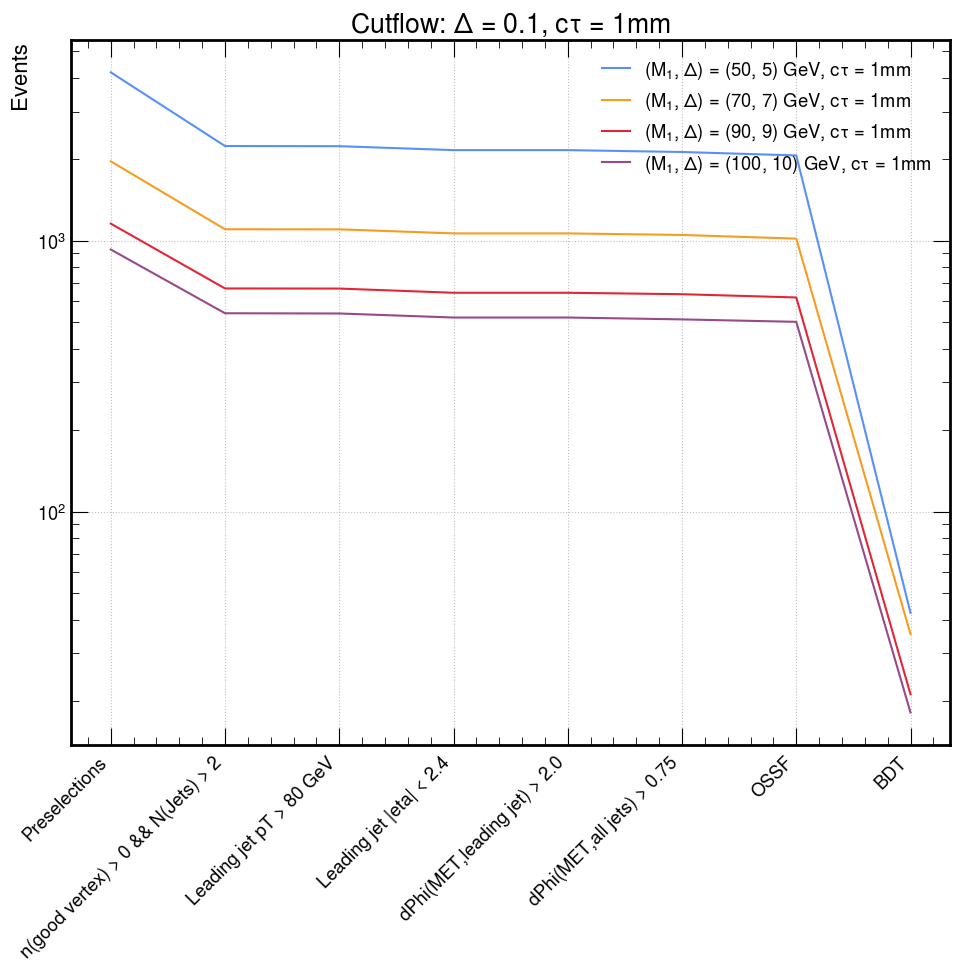

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_10_m50to100.png


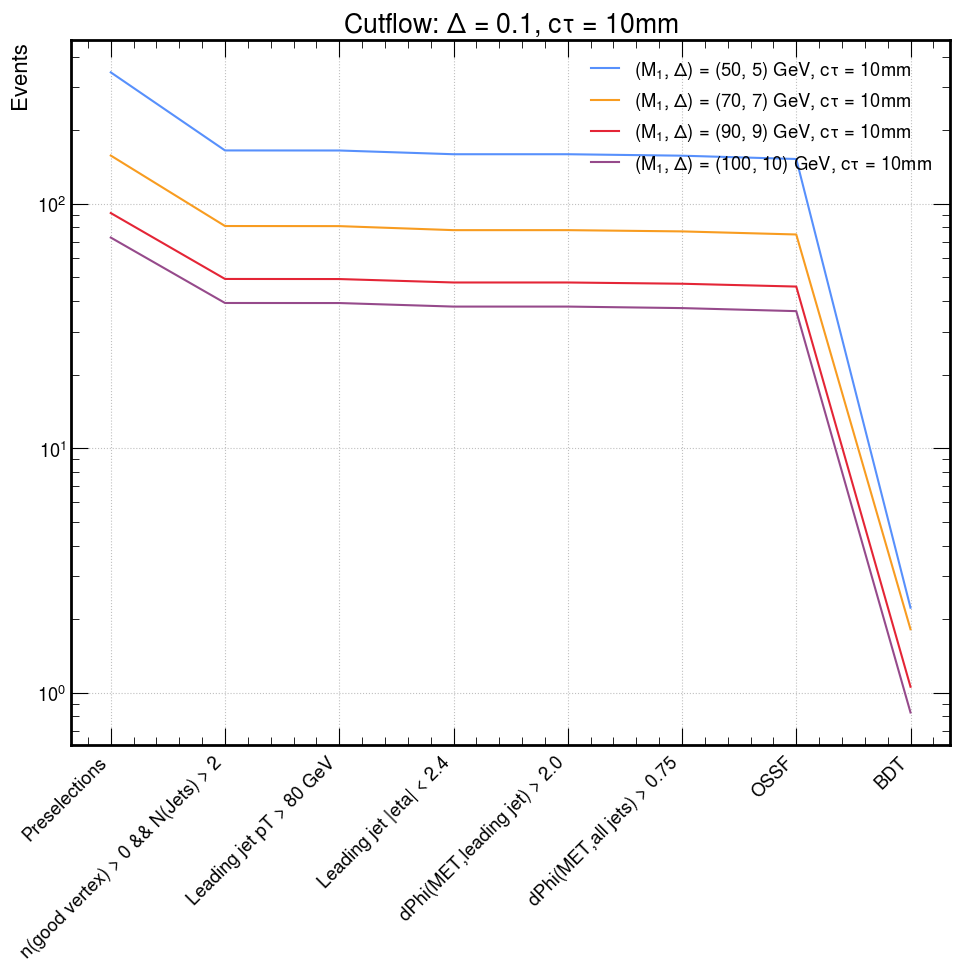

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p1_ct_100_m50to100.png


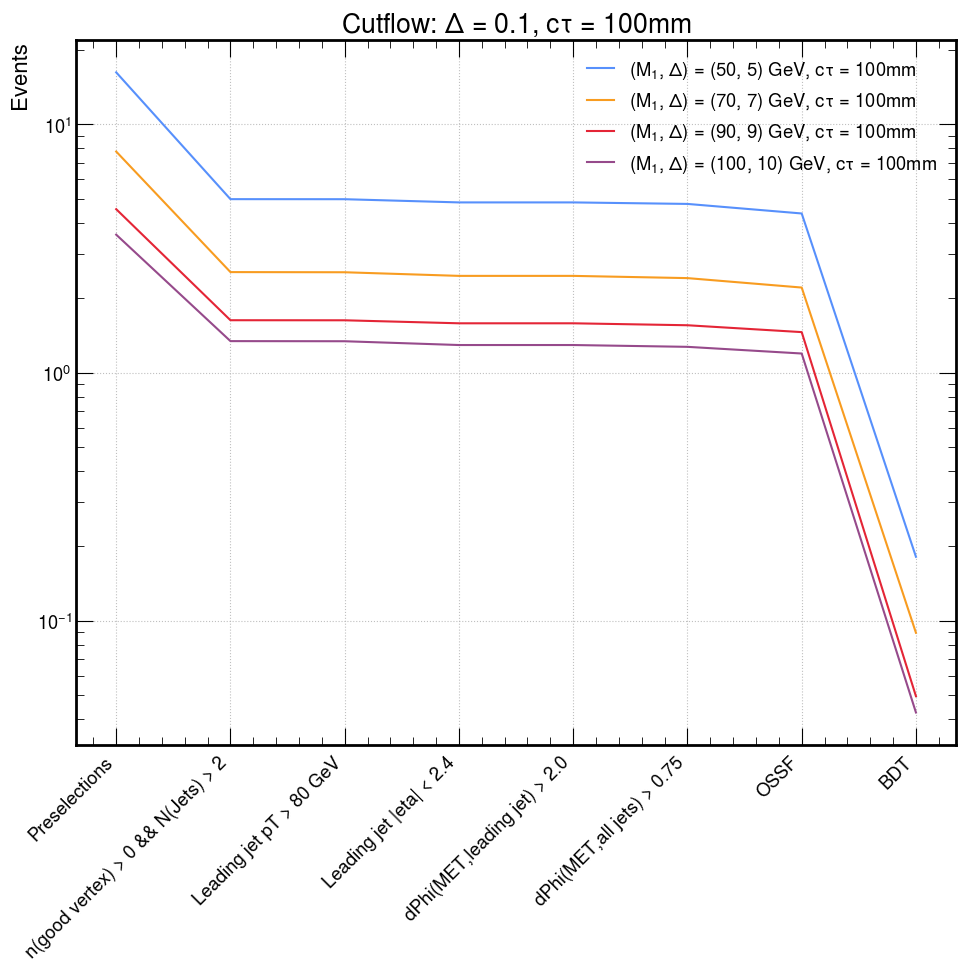

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_1_m50to100.png


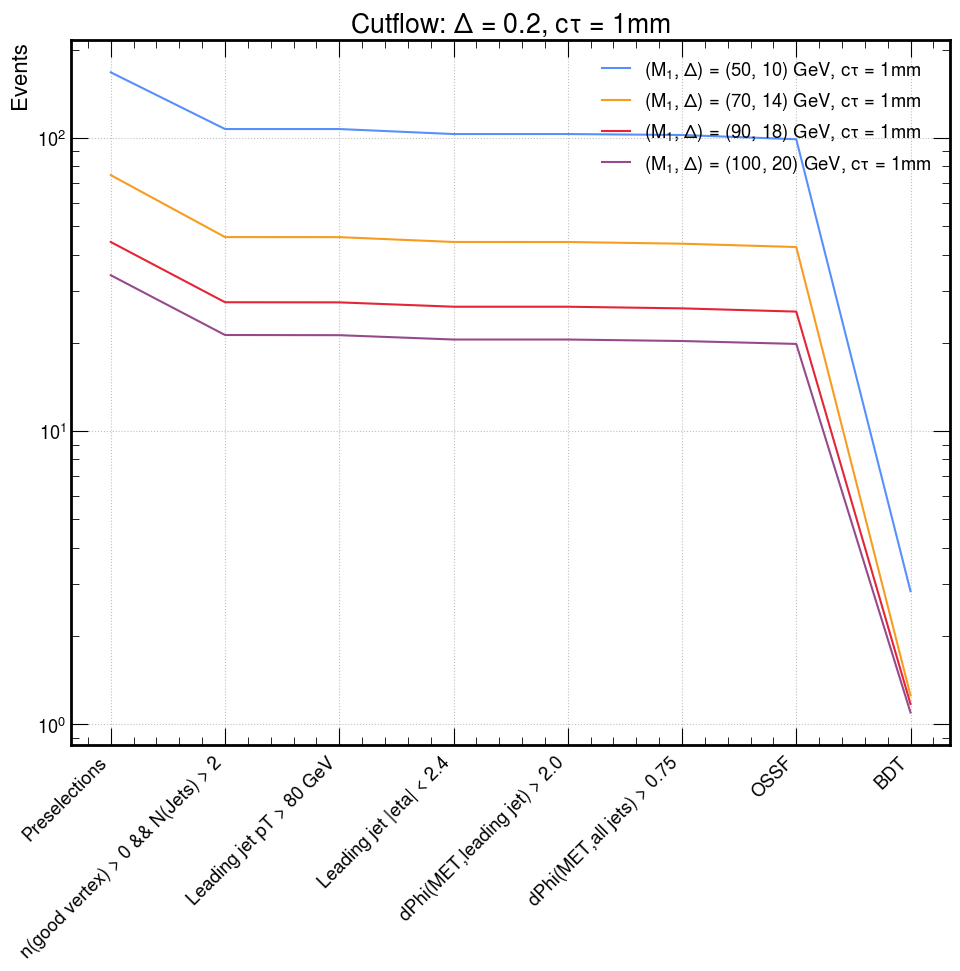

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_10_m50to100.png


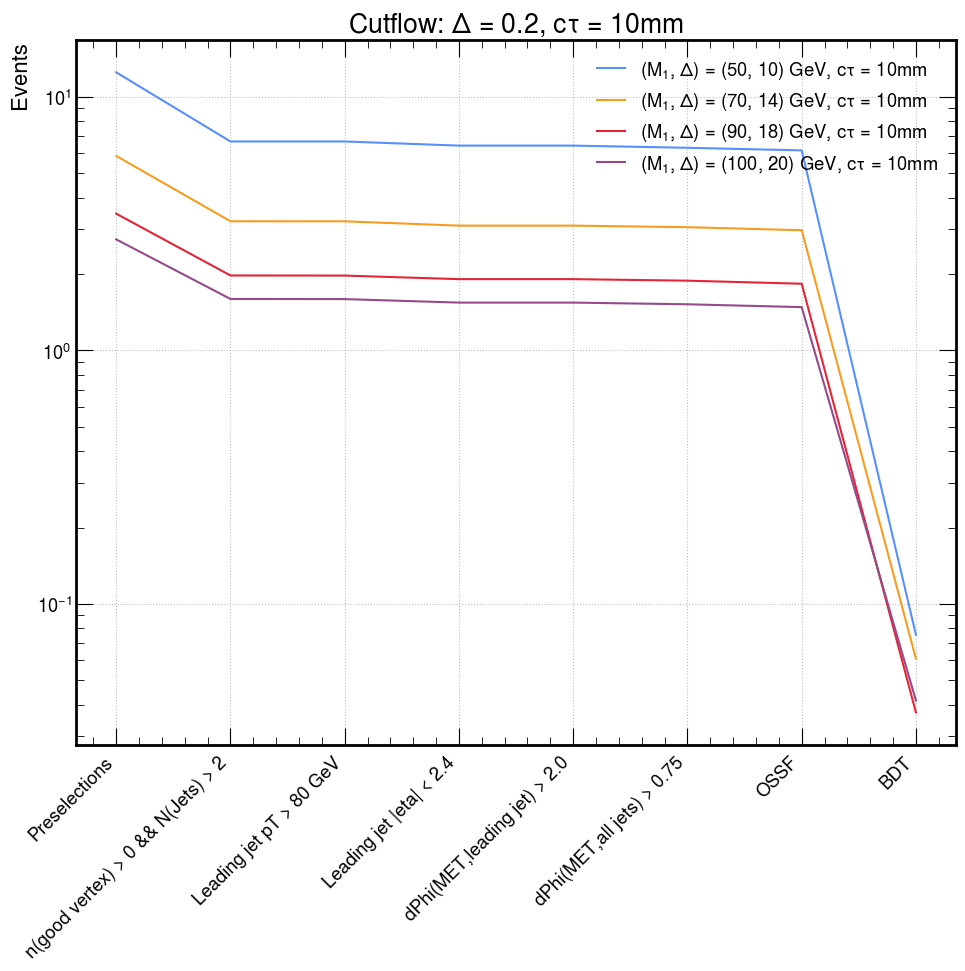

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'BDT']
Saved: ./plots/cutflow//Cutflow_VR_signal_delta_0p2_ct_100_m50to100.png


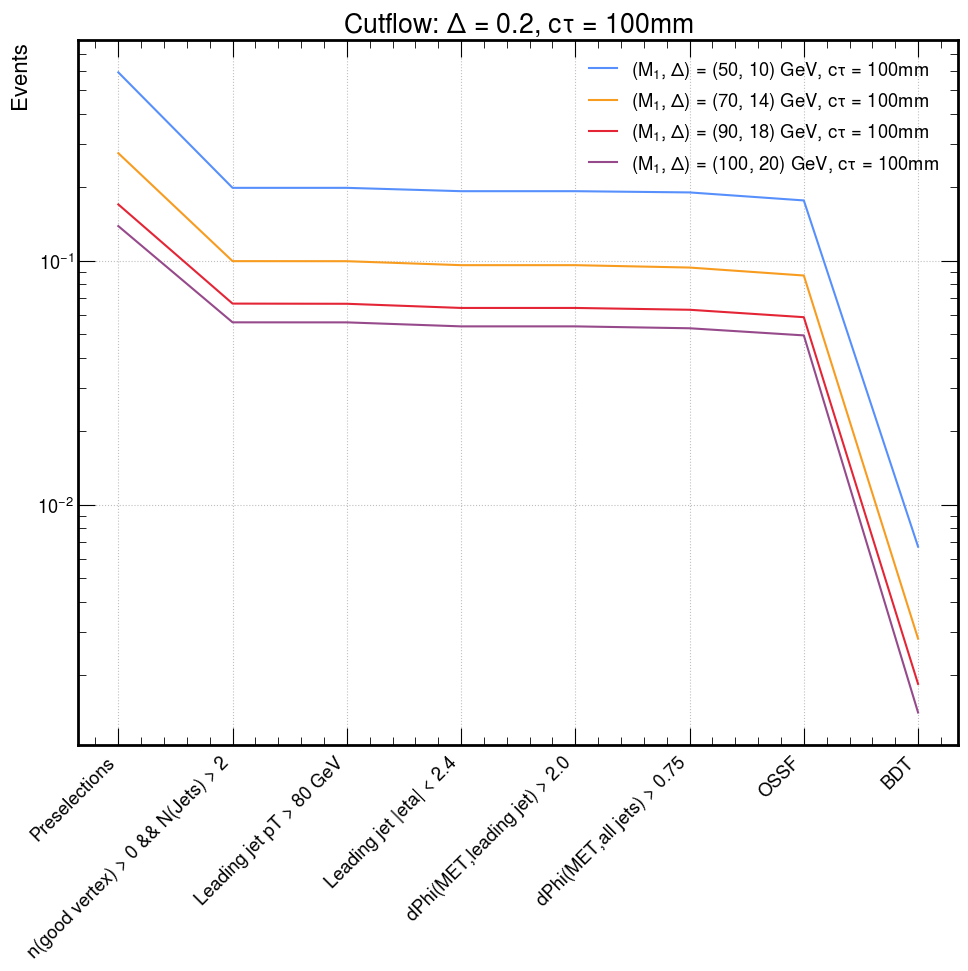

In [21]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_VR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [22]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,BDT
ZGamma,0.00032468,0.00001653,0.00001398,0.00001313,0.00001310,0.00001314,0.00000881,0.00000677
Top,0.00039885,0.00001298,0.00001210,0.00001090,0.00001077,0.00000985,0.00000627,0.00000520
Multiboson,0.00065832,0.00003441,0.00003004,0.00002763,0.00002678,0.00002517,0.00001774,0.00001541
WJets,0.00101318,0.00003720,0.00003665,0.00003480,0.00003459,0.00003180,0.00001672,0.00001222
ZJets,0.00242159,0.00007613,0.00007541,0.00007141,0.00007118,0.00006654,0.00003517,0.00002526
DY,0.00018701,0.00001151,0.00001141,0.00001094,0.00001083,0.00000952,0.00000760,0.00000480
QCD,0.00000249,0.00000001,0.00000001,0.00000001,0.00000001,0.00000000,0.00000000,0.00000000
Total,0.00001696,0.00000054,0.00000052,0.00000049,0.00000049,0.00000044,0.00000024,0.00000018


In [23]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_ABCD_VR2_goodvtx_v11_NJetG0L3_OSSF/Cutflow/Efficiency//Background_Efficiency.csv


In [24]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,BDT
ZGamma,"1,665.13",84.77,71.71,67.31,67.20,67.41,45.16,34.71
Top,"26,174.93",851.60,793.75,715.64,706.97,646.17,411.66,341.39
Multiboson,"4,588.16",239.80,209.34,192.59,186.67,175.45,123.66,107.38
WJets,"214,692.24","7,883.42","7,765.40","7,373.78","7,330.01","6,739.24","3,542.39","2,590.15"
ZJets,"63,745.58","2,003.91","1,985.06","1,879.87","1,873.73","1,751.69",925.74,665.02
DY,"5,819.49",358.21,355.08,340.58,337.02,296.39,236.56,149.41
QCD,"53,432.27",275.55,275.55,214.93,206.03,32.90,16.05,16.05
Total,"370,117.80","11,697.26","11,455.88","10,784.71","10,707.63","9,709.25","5,301.23","3,904.12"


In [25]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_ABCD_VR2_goodvtx_v11_NJetG0L3_OSSF/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [26]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,BDT
ZGamma,6506,343,307,292,279,252,158,121
Top,703976,21950,20178,18131,17729,16114,10382,8751
Multiboson,25187,1310,1106,1027,966,905,641,568
WJets,1177020,21199,20944,20158,19793,16850,8815,6628
ZJets,738994,12563,12452,11965,11824,10144,5327,3798
DY,296131,7134,7103,6985,6640,4563,3734,2796
QCD,31490,92,92,90,88,6,2,2
Total,2979304,64591,62182,58648,57319,48834,29059,22664


In [27]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,BDT
ZGamma,6506,343,307,292,279,252,158,121
Top,703976,21950,20178,18131,17729,16114,10382,8751
Multiboson,25187,1310,1106,1027,966,905,641,568
WJets,1177020,21199,20944,20158,19793,16850,8815,6628
ZJets,738994,12563,12452,11965,11824,10144,5327,3798
DY,296131,7134,7103,6985,6640,4563,3734,2796
QCD,31490,92,92,90,88,6,2,2
Total,2979304,64591,62182,58648,57319,48834,29059,22664


In [28]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_ABCD_VR2_goodvtx_v11_NJetG0L3_OSSF/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [29]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 3904.12


In [30]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,ZGamma,Top,Multiboson,WJets,ZJets,DY,QCD,Total
Weighted Counts,34.71,341.39,107.38,"2,590.15",665.02,149.41,16.05,"3,904.12"
Raw Counts,121.00,"8,751.00",568.00,"6,628.00","3,798.00","2,796.00",2.00,"22,664.00"


## Data

In [31]:
pd.options.display.float_format = '{:,.1f}'.format
data_cts_df = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
data_cts_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,BDT
data_2018_Data_MET_UL18_MET_Run2018D,"364,388.0","11,961.0","11,710.0","7,588.0","7,521.0","6,629.0","3,481.0","2,623.0"
data_2018_Data_MET_UL18_MET_Run2018C,"82,311.0","2,778.0","2,716.0","1,667.0","1,658.0","1,488.0",784.0,593.0
data_2018_Data_MET_UL18_MET_Run2018B,"63,816.0","2,697.0","2,637.0","1,551.0","1,536.0","1,376.0",738.0,542.0
data_2018_Data_MET_UL18_MET_Run2018A,"125,215.0","5,118.0","5,020.0","2,751.0","2,714.0","2,434.0","1,327.0","1,013.0"
Total,"635,730.0","22,554.0","22,083.0","13,557.0","13,429.0","11,927.0","6,330.0","4,771.0"


In [32]:
pd.options.display.float_format = '{:,.1f}'.format

data_composition = pd.DataFrame(data_cts_df[data_cts_df.columns.values[-1]]).transpose()

data_composition = data_composition.rename(index={data_cts_df.columns.values[-1]: 'Data Yield'})
data_composition = data_composition.rename(columns={'data_2018_Data_MET_UL18_MET_Run2018C': 'Run2018C', \
                                                   'data_2018_Data_MET_UL18_MET_Run2018B': 'Run2018B', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018A': 'Run2018A', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018D': 'Run2018D'
                                                   })

data_composition = data_composition.reindex(sorted(data_composition.columns), axis=1)

data_composition

,Run2018A,Run2018B,Run2018C,Run2018D,Total
Data Yield,"1,013.0",542.0,593.0,"2,623.0","4,771.0"


In [33]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections                 1.7
n(good vertex) > 0            1.9
Leading jet pT > 80 GeV       1.9
Leading jet |eta| < 2.4       1.3
dPhi(MET,leading jet) > 2.0   1.3
dPhi(MET,all jets) > 0.75     1.2
OSSF                          1.2
BDT                           1.2
Name: Total, dtype: float64

In [34]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                 635,730.0
n(good vertex) > 0             22,554.0
Leading jet pT > 80 GeV        22,083.0
Leading jet |eta| < 2.4        13,557.0
dPhi(MET,leading jet) > 2.0    13,429.0
dPhi(MET,all jets) > 0.75      11,927.0
OSSF                            6,330.0
BDT                             4,771.0
Name: Total, dtype: float64

In [35]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections                 370,117.8
n(good vertex) > 0             11,697.3
Leading jet pT > 80 GeV        11,455.9
Leading jet |eta| < 2.4        10,784.7
dPhi(MET,leading jet) > 2.0    10,707.6
dPhi(MET,all jets) > 0.75       9,709.3
OSSF                            5,301.2
BDT                             3,904.1
Name: Total, dtype: float64

/tmp/ipykernel_3761691/1904301384.py:17: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)


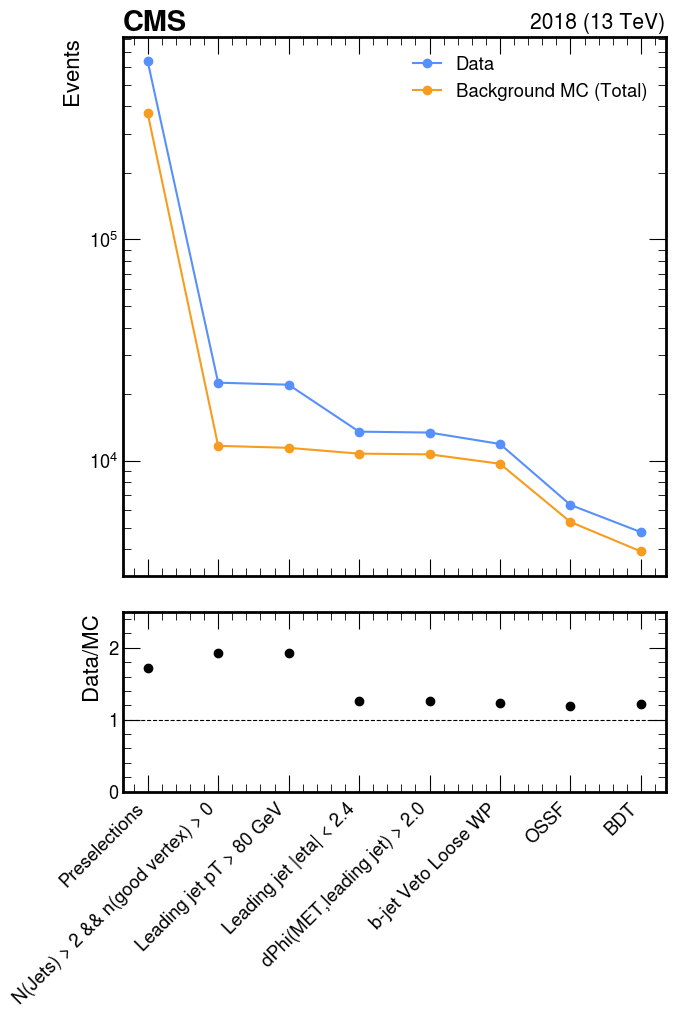

In [36]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')

plt.legend()

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,2.5])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'
cuts[5] = 'b-jet Veto Loose WP'

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')



### Plot the efficiency

Saved: ./plots/BDT_ABCD_VR2_goodvtx_v11_NJetG0L3_OSSF/cutflow//Cutflow_background.png


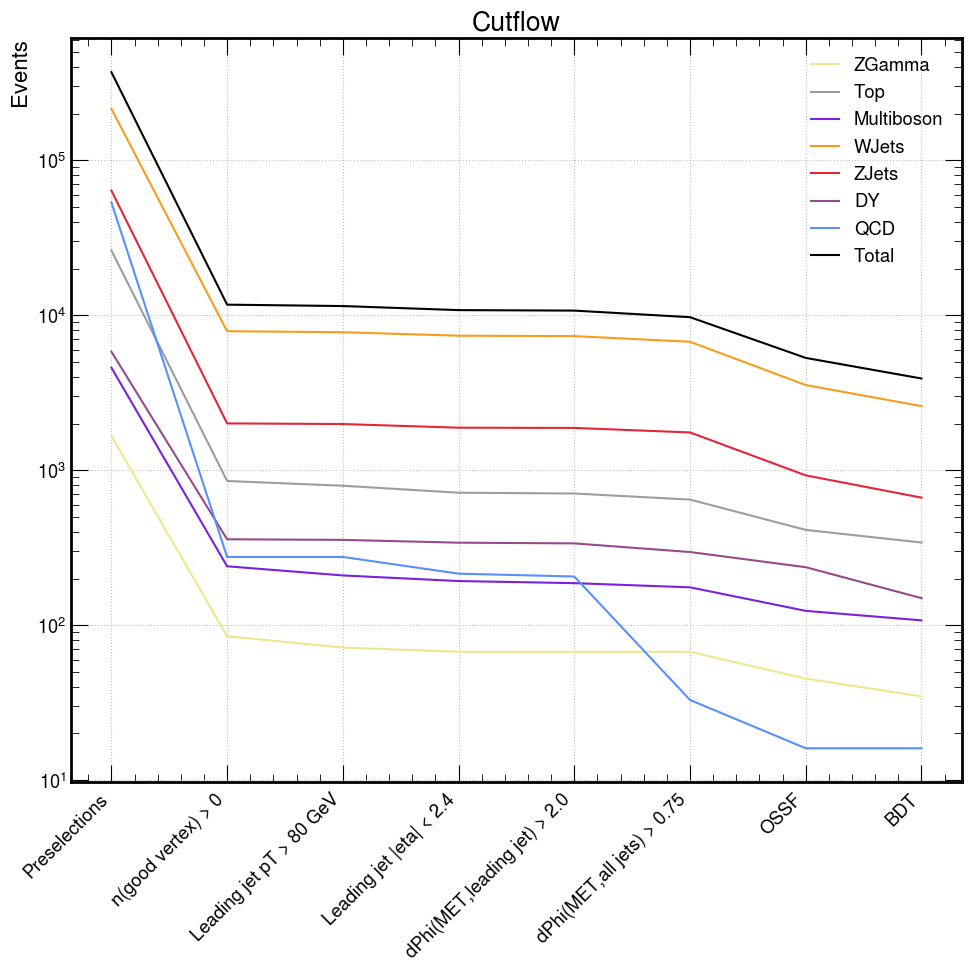

In [37]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

In [38]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                 635,730.0
n(good vertex) > 0             22,554.0
Leading jet pT > 80 GeV        22,083.0
Leading jet |eta| < 2.4        13,557.0
dPhi(MET,leading jet) > 2.0    13,429.0
dPhi(MET,all jets) > 0.75      11,927.0
OSSF                            6,330.0
BDT                             4,771.0
Name: Total, dtype: float64

In [39]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,BDT
ZGamma,"1,665.1",84.8,71.7,67.3,67.2,67.4,45.2,34.7
Top,"26,174.9",851.6,793.7,715.6,707.0,646.2,411.7,341.4
Multiboson,"4,588.2",239.8,209.3,192.6,186.7,175.5,123.7,107.4
WJets,"214,692.2","7,883.4","7,765.4","7,373.8","7,330.0","6,739.2","3,542.4","2,590.2"
ZJets,"63,745.6","2,003.9","1,985.1","1,879.9","1,873.7","1,751.7",925.7,665.0
DY,"5,819.5",358.2,355.1,340.6,337.0,296.4,236.6,149.4
QCD,"53,432.3",275.6,275.6,214.9,206.0,32.9,16.0,16.0
Total,"370,117.8","11,697.3","11,455.9","10,784.7","10,707.6","9,709.3","5,301.2","3,904.1"


KeyError: 'Top'

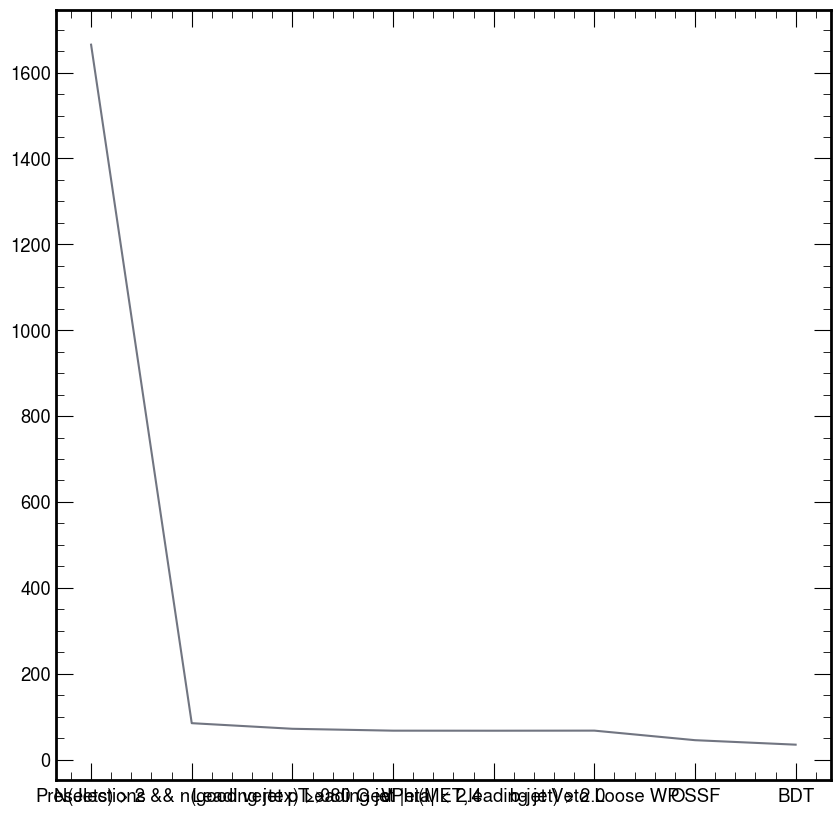

In [40]:
cmap = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"] # cms-recommended

bkg_cmap = {
    "QCD": cmap[0],
    "WJets": cmap[1],
    "ZJets": cmap[2],
    "DY-M4to50": cmap[3],
    "DY-M50": cmap[4],
    "TTbar": cmap[5],
    "SingleTop": cmap[6],
    "Multiboson": cmap[7],
    "ZGamma": cmap[8],
    "TTX": cmap[9]
}

df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
processes = df.index.values.tolist()

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'
cuts[5] = 'b-jet Veto Loose WP'

# Color map for each process
for process in processes:
    if 'Total' in process:
        plt.plot(cuts, df.loc[process], label=process, color='black')
    else:
        plt.plot(cuts, df.loc[process], label=process, color = bkg_cmap[process])

# plot data
df_data = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
plt.plot(cuts, df_data.loc['Total'], label='Data: Run2018[A-D]', color = 'blue', marker='o', linestyle='--')

if plot_dict_bkg_eff['doLog']:
    plt.yscale('log')

if plot_dict_bkg_eff['ylim'] != None:
    plt.ylim(plot_dict_bkg_eff['ylim'][0], plot_dict_bkg_eff['ylim'][1])
    
plt.grid()
    
plt.ylabel(plot_dict_bkg_eff['ylabel'])
plt.title(plot_dict_bkg_eff['title'])
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
plt.legend(loc='upper right')
    
if plot_dict_bkg_eff['doSave']:
    os.makedirs(plot_dict_bkg_eff['outDir'], exist_ok=True)
    plt.tight_layout()
    plt.savefig(f"{plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    print(f"Saved: {plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    
plt.show()